<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_fractal_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python Fraktálok készítése

PIL, pygame és turtle csomagggal


<https://klajosw.blogspot.com/>


---

---

## Fractal rajzolás PIL csomaggal


- pip install pillow
- pip install numpy

---

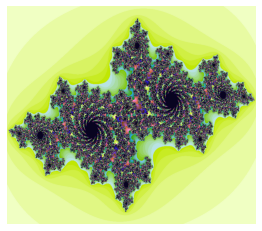

In [ ]:
# Python code for Julia Fractal 

from PIL import Image 
import matplotlib.pyplot as plt
   
    
# setting the width, height and zoom of the image to be created 
#    w, h, zoom = 1920,1080,1
w, h, zoom = 800, 700, 1
 
# creating the new image in RGB mode 
img = Image.new("RGB", (w, h), "white") 
  
# Allocating the storage for the image and loading the pixel data. 
pix = img.load() 
     
# setting up the variables according to the equation to  create the fractal 
cX, cY = -0.7, 0.27015
moveX, moveY = 0.0, 0.0
maxIter = 255
   
for x in range(w): 
        for y in range(h): 
            zx = 1.5*(x - w/2)/(0.5*zoom*w) + moveX 
            zy = 1.0*(y - h/2)/(0.5*zoom*h) + moveY 
            i = maxIter 
            while zx*zx + zy*zy < 4 and i > 1: 
                tmp = zx*zx - zy*zy + cX 
                zy,zx = 2.0*zx*zy + cY, tmp 
                i -= 1
  
            # convert byte to RGB (3 bytes), kinda  // magic to get nice colors 
            pix[x,y] = (i << 21) + (i << 10) + i*8
  
# to display the created fractal 
#img.show() 

plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()
    


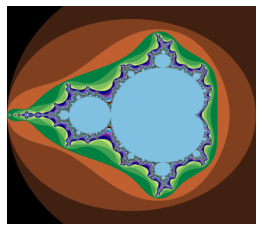

In [ ]:
# Python code for Mandelbrot Fractal 1

from PIL import Image 
import matplotlib.pyplot as plt
  
# drawing area 
xa = -2.0
xb = 1.0
ya = -1.5
yb = 1.5
  
# max iterations allowed 
maxIt = 255 
  
# image size 
imgx = 800
imgy = 700
img = Image.new("RGB", (imgx, imgy)) 
  
for y in range(imgy): 
    zy = y * (yb - ya) / (imgy - 1)  + ya 
    for x in range(imgx): 
        zx = x * (xb - xa) / (imgx - 1)  + xa 
        z = zx + zy * 1j
        c = z 
        for i in range(maxIt): 
            if abs(z) > 2.0: break
            z = z * z + c 
        img.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
        
         
# image.show() 

plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()

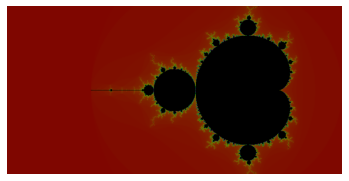

In [ ]:
# Python code for Mandelbrot Fractal 2

from PIL import Image 
from numpy import complex, array 
import colorsys 
  
# setting the width of the output image as 1024 
WIDTH = 800
  
# a function to return a tuple of colors 
# as integer value of rgb 
def rgb_conv(i): 
    color = 255 * array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5)) 
    return tuple(color.astype(int)) 
  
# function defining a mandelbrot 
def mandelbrot(x, y): 
    c0 = complex(x, y) 
    c = 0
    for i in range(1, 1000): 
        if abs(c) > 2: 
            return rgb_conv(i) 
        c = c * c + c0 
    return (0, 0, 0) 
  
# creating the new image in RGB mode 
img = Image.new('RGB', (WIDTH, int(WIDTH / 2))) 
pixels = img.load() 
  
for x in range(img.size[0]):      
#    displaying the progress as percentage 
#    print("%.2f %%" % (x / WIDTH * 100.0))  
    for y in range(img.size[1]): 
        pixels[x, y] = mandelbrot((x - (0.75 * WIDTH)) / (WIDTH / 4), 
                                      (y - (WIDTH / 4)) / (WIDTH / 4)) 
        
# to display the created fractal after completing the given number of iterations 
# img.show() 

plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()


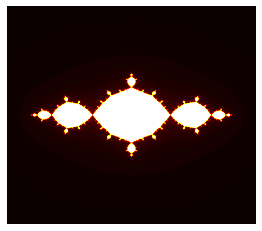

In [ ]:
# Python code for Mandelbrot Fractal 3.

from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(n_rows, n_columns, iterations, cx, cy):
    x_cor = np.linspace(-2, 2, n_rows)
    y_cor = np.linspace(-2, 2, n_columns)
    x_len = len(x_cor)
    y_len = len(y_cor)
    output = np.zeros((x_len,y_len))
    c = complex(cx, cy)
    for i in range(x_len):
        for j in range(y_len):
            z = complex(x_cor[i], y_cor[j])
            count = 0
            for k in range(iterations):
                z = (z * z) + c
                count = count + 1
                if (abs(z) > 4):
                    break
            output[i,j] = count
#        print(int((i/x_len)*100),"% completed")
#   print(output)
    plt.imshow(output.T, cmap='hot')
    plt.axis("off")
    plt.show()

    
#    This magnificent Julia fractal is generated when the value of C is -0.42+0.6j and iterated 120 times.
mandelbrot(800, 700, 100, -0.42, +0.6j)


---

## Fractal rajzolás pygame csomaggal

---

In [ ]:
# Importing the python libraries 
import pygame, math 
  
# Initialize all imported pygame modules 
pygame.init() 
  
# Create a new surface and window. 
surface_height, surface_width = 800, 600        #Surface variables 
main_surface = pygame.display.set_mode((surface_height,surface_width)) 
  
# Captioning the window 
pygame.display.set_caption("Fractal_Tree_geeksforgeeks") 
  
def draw_tree(order, theta, sz, posn, heading, color=(0,0,0), depth=0): 
  
   # The relative ratio of the trunk to the whole tree   
   trunk_ratio = 0.29     
  
   # Length of the trunk   
   trunk = sz * trunk_ratio 
   delta_x = trunk * math.cos(heading) 
   delta_y = trunk * math.sin(heading) 
   (u, v) = posn 
   newpos = (u + delta_x, v + delta_y) 
   pygame.draw.line(main_surface, color, posn, newpos) 
  
   if order > 0:   # Draw another layer of subtrees 
  
      # These next six lines are a simple hack to make  
      # the two major halves of the recursion different  
      # colors. Fiddle here to change colors at other  
      # depths, or when depth is even, or odd, etc. 
      if depth == 0: 
          color1 = (255, 0, 0) 
          color2 = (0, 0, 255) 
      else: 
          color1 = color 
          color2 = color 
  
      # make the recursive calls to draw the two subtrees 
      newsz = sz*(1 - trunk_ratio) 
      draw_tree(order-1, theta, newsz, newpos, heading-theta, color1, depth+1) 
      draw_tree(order-1, theta, newsz, newpos, heading+theta, color2, depth+1) 
  
  
def main(): 
    theta = 0
  
    while True: 
  
        # Update the angle 
        theta += 0.01
  
        # This little part lets us draw the stuffs  
        # in the screen everything 
        main_surface.fill((255, 255, 0)) 
        draw_tree(9, theta, surface_height*0.9, (surface_width//2, surface_width-50), -math.pi/2) 
        pygame.display.flip() 
  
# Calling the main function 
main() 
pygame.quit() 

In [ ]:
import pygame, math

pygame.init()
screen = pygame.display.set_mode((750, 650))
pygame.display.set_caption("Fractal Tree")
display = pygame.display.get_surface()

def drawTree(a, b, pos, deepness):
    if deepness:
        c = a + int(math.cos(math.radians(pos)) * deepness * 10.0)
        d = b + int(math.sin(math.radians(pos)) * deepness * 10.0)
        pygame.draw.line(display, (127,255,0), (a, b), (c, d), 1)
        drawTree(c, d, pos - 25, deepness - 1)
        drawTree(c, d, pos + 25, deepness- 1)

def process(event):
   if event.type == pygame.QUIT:
      exit(0)

drawTree(370, 650, -90, 10)
pygame.display.flip()

# while True:
#     process(pygame.event.wait())

In [ ]:
import pygame, math
 
pygame.init()
window = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Fractal Tree")
screen = pygame.display.get_surface()
 
def drawTree(x1, y1, angle, depth):
    fork_angle = 20
    base_len = 10.0
    if depth > 0:
        x2 = x1 + int(math.cos(math.radians(angle)) * depth * base_len)
        y2 = y1 + int(math.sin(math.radians(angle)) * depth * base_len)
        pygame.draw.line(screen, (255,255,255), (x1, y1), (x2, y2), 2)
        drawTree(x2, y2, angle - fork_angle, depth - 1)
        drawTree(x2, y2, angle + fork_angle, depth - 1)
 
def input(event):
    if event.type == pygame.QUIT:
        exit(0)
 
drawTree(300, 550, -90, 9)
pygame.display.flip()
while True:
    input(pygame.event.wait())

---

## Fractal rajzolás turtle csomaggal

---

In [ ]:
## H-Tree Fractal using recursion and Turtle Graphics.


import turtle

SPEED = 5
BG_COLOR = "blue"
PEN_COLOR = "lightgreen"
SCREEN_WIDTH = 500
SCREEN_HEIGHT = 500
DRAWING_WIDTH = 400
DRAWING_HEIGHT = 400
PEN_WIDTH = 5
TITLE = "H-Tree Fractal with Python Turtle Graphics"
FRACTAL_DEPTH = 3


def draw_line(tur, pos1, pos2):
    tur.penup()
    tur.goto(pos1[0], pos1[1])
    tur.pendown()
    tur.goto(pos2[0], pos2[1])


def recursive_draw(tur, x, y, width, height, count):
    draw_line(
        tur,
        [x + width * 0.25, height // 2 + y],
        [x + width * 0.75, height // 2 + y],
    )
    draw_line(
        tur,
        [x + width * 0.25, (height * 0.5) // 2 + y],
        [x + width * 0.25, (height * 1.5) // 2 + y],
    )
    draw_line(
        tur,
        [x + width * 0.75, (height * 0.5) // 2 + y],
        [x + width * 0.75, (height * 1.5) // 2 + y],
    )

    if count <= 0:  # The base case
        return
    else:  # The recursive step
        count -= 1
        # Top left
        recursive_draw(tur, x, y, width // 2, height // 2, count)
        # Top right
        recursive_draw(tur, x + width // 2, y, width // 2, height // 2, count)
        # Bottom left
        recursive_draw(tur, x, y + width // 2, width // 2, height // 2, count)
        # Bottom right
        recursive_draw(tur, x + width // 2, y + width // 2, width // 2, height // 2, count)


if __name__ == "__main__":
    # Screen setup
    screen = turtle.Screen()
    screen.setup(SCREEN_WIDTH, SCREEN_HEIGHT)
    screen.title(TITLE)
    screen.bgcolor(BG_COLOR)

    # Turtle artist (pen) setup
    artist = turtle.Turtle()
    artist.hideturtle()
    artist.pensize(PEN_WIDTH)
    artist.color(PEN_COLOR)
    artist.speed(SPEED)

    # Initial call to recursive draw function
    recursive_draw(artist, - DRAWING_WIDTH / 2, - DRAWING_HEIGHT / 2, DRAWING_WIDTH, DRAWING_HEIGHT, FRACTAL_DEPTH)

    # Every Python Turtle program needs this (or an equivalent) to work correctly.
    turtle.done()


In [ ]:
# Python code to draw snowflakes fractal. 

import turtle 
import random 
  
# setup the window with a background color 
wn = turtle.Screen() 
wn.bgcolor("cyan") 
  
# assign a name to your turtle 
elsa = turtle.Turtle() 
elsa.speed(15) 
  
# create a list of colours 
sfcolor = ["white", "blue", "purple", "grey", "magenta"] 
  
# create a function to create different size snowflakes 
def snowflake(size): 
  
    # move the pen into starting position 
    elsa.penup() 
    elsa.forward(10*size) 
    elsa.left(45) 
    elsa.pendown() 
    elsa.color(random.choice(sfcolor)) 
  
    # draw branch 8 times to make a snowflake 
    for i in range(8): 
        branch(size)    
        elsa.left(45) 
      
  
# create one branch of the snowflake 
def branch(size): 
    for i in range(3): 
        for i in range(3): 
            elsa.forward(10.0*size/3) 
            elsa.backward(10.0*size/3) 
            elsa.right(45) 
        elsa.left(90) 
        elsa.backward(10.0*size/3) 
        elsa.left(45) 
    elsa.right(90)  
    elsa.forward(10.0*size) 
  
# loop to create 20 different sized snowflakes  
# with different starting co-ordinates 
for i in range(20): 
    x = random.randint(-200, 200) 
    y = random.randint(-200, 200) 
    sf_size = random.randint(1, 4) 
    elsa.penup() 
    elsa.goto(x, y) 
    elsa.pendown() 
    snowflake(sf_size) 
  
# leave the window open until you click to close   
wn.exitonclick()   

In [ ]:
#importing the required libraries 
import random, argparse 
import math 
import turtle 
from PIL import Image 
from datetime import datetime     
from fractions import gcd 
  
# A class that draws a spirograph 
class Spiro: 
    # constructor 
    def __init__(self, xc, yc, col, R, r, l): 
  
        # create own turtle 
        self.t = turtle.Turtle() 
        # set cursor shape 
        self.t.shape('turtle') 
        # set step in degrees 
        self.step = 5
        # set drawing complete flag 
        self.drawingComplete = False
  
        # set parameters 
        self.setparams(xc, yc, col, R, r, l) 
  
        # initiatize drawing 
        self.restart() 
  
    # set parameters 
    def setparams(self, xc, yc, col, R, r, l): 
        # spirograph parameters 
        self.xc = xc 
        self.yc = yc 
        self.R = int(R) 
        self.r = int(r) 
        self.l = l 
        self.col = col 
        # reduce r/R to smallest form by dividing with GCD 
        gcdVal = gcd(self.r, self.R) 
        self.nRot = self.r//gcdVal 
        # get ratio of radii 
        self.k = r/float(R) 
        # set color 
        self.t.color(*col) 
        # current angle 
        self.a = 0
  
    # restart drawing 
    def restart(self): 
        # set flag 
        self.drawingComplete = False
        # show turtle 
        self.t.showturtle() 
        # go to first point 
        self.t.up() 
        R, k, l = self.R, self.k, self.l 
        a = 0.0
        x = R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
        y = R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
        self.t.setpos(self.xc + x, self.yc + y) 
        self.t.down() 
  
    # draw the whole thing 
    def draw(self): 
        # draw rest of points 
        R, k, l = self.R, self.k, self.l 
        for i in range(0, 360*self.nRot + 1, self.step): 
            a = math.radians(i) 
            x = R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
            y = R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
            self.t.setpos(self.xc + x, self.yc + y) 
        # done - hide turtle 
        self.t.hideturtle() 
      
    # update by one step 
    def update(self): 
        # skip if done 
        if self.drawingComplete: 
            return
        # increment angle 
        self.a += self.step 
        # draw step 
        R, k, l = self.R, self.k, self.l 
        # set angle 
        a = math.radians(self.a) 
        x = self.R*((1-k)*math.cos(a) + l*k*math.cos((1-k)*a/k)) 
        y = self.R*((1-k)*math.sin(a) - l*k*math.sin((1-k)*a/k)) 
        self.t.setpos(self.xc + x, self.yc + y) 
        # check if drawing is complete and set flag 
        if self.a >= 360*self.nRot: 
            self.drawingComplete = True
            # done - hide turtle 
            self.t.hideturtle() 
  
    # clear everything 
    def clear(self): 
        self.t.clear() 
  
# A class for animating spirographs 
class SpiroAnimator: 
    # constructor 
    def __init__(self, N): 
        # timer value in milliseconds 
        self.deltaT = 10
        # get window dimensions 
        self.width = turtle.window_width() 
        self.height = turtle.window_height() 
        # create spiro objects 
        self.spiros = [] 
        for i in range(N): 
            # generate random parameters 
            rparams = self.genRandomParams() 
            # set spiro params 
            spiro = Spiro(*rparams) 
            self.spiros.append(spiro) 
        # call timer 
        turtle.ontimer(self.update, self.deltaT) 
      
    # restart sprio drawing 
    def restart(self): 
        for spiro in self.spiros: 
            # clear 
            spiro.clear() 
            # generate random parameters 
            rparams = self.genRandomParams() 
            # set spiro params 
            spiro.setparams(*rparams) 
            # restart drawing 
            spiro.restart() 
  
    # generate random parameters 
    def genRandomParams(self): 
        width, height = self.width, self.height 
        R = random.randint(50, min(width, height)//2) 
        r = random.randint(10, 9*R//10) 
        l = random.uniform(0.1, 0.9) 
        xc = random.randint(-width//2, width//2) 
        yc = random.randint(-height//2, height//2) 
        col = (random.random(), 
               random.random(), 
               random.random()) 
        return (xc, yc, col, R, r, l) 
  
    def update(self): 
        # update all spiros 
        nComplete = 0
        for spiro in self.spiros: 
            # update 
            spiro.update() 
            # count completed ones 
            if spiro.drawingComplete: 
                nComplete+= 1
        # if all spiros are complete, restart 
        if nComplete == len(self.spiros): 
            self.restart() 
        # call timer 
        turtle.ontimer(self.update, self.deltaT) 
  
    # toggle turtle on/off 
    def toggleTurtles(self): 
        for spiro in self.spiros: 
            if spiro.t.isvisible(): 
                spiro.t.hideturtle() 
            else: 
                spiro.t.showturtle() 
              
# save spiros to image 
def saveDrawing(): 
    # hide turtle 
    turtle.hideturtle() 
    # generate unique file name 
    dateStr = (datetime.now()).strftime("%d%b%Y-%H%M%S") 
    fileName = 'spiro-' + dateStr  
    print('saving drawing to %s.eps/png' % fileName) 
    # get tkinter canvas 
    canvas = turtle.getcanvas() 
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 
    # show turtle 
    turtle.showturtle() 
  
# main() function 
def main(): 
    # use sys.argv if needed 
    print('generating spirograph...') 
    # create parser 
    descStr = """This program draws spirographs using the Turtle module.  
    When run with no arguments, this program draws random spirographs. 
      
    Terminology: 
  
    R: radius of outer circle. 
    r: radius of inner circle. 
    l: ratio of hole distance to r. 
    """
    parser = argparse.ArgumentParser(description=descStr) 
    
    # add expected arguments 
    parser.add_argument('--sparams', nargs=3, dest='sparams', required=False,  
                        help="The three arguments in sparams: R, r, l.") 
                          
  
    # parse args 
    args = parser.parse_args() 
  
    # set to 80% screen width 
    turtle.setup(width=0.8) 
  
    # set cursor shape 
    turtle.shape('turtle') 
  
    # set title 
    turtle.title("Spirographs!") 
    # add key handler for saving images 
    turtle.onkey(saveDrawing, "s") 
    # start listening  
    turtle.listen() 
  
    # hide main turtle cursor 
    turtle.hideturtle() 
  
    # checks args and draw 
    if args.sparams: 
        params = [float(x) for x in args.sparams] 
        # draw spirograph with given parameters 
        # black by default 
        col = (0.0, 0.0, 0.0) 
        spiro = Spiro(0, 0, col, *params) 
        spiro.draw() 
    else: 
        # create animator object 
        spiroAnim = SpiroAnimator(4) 
        # add key handler to toggle turtle cursor 
        turtle.onkey(spiroAnim.toggleTurtles, "t") 
        # add key handler to restart animation 
        turtle.onkey(spiroAnim.restart, "space") 
  
    # start turtle main loop 
    turtle.mainloop() 
  
# call main 
#if __name__ == '__main__': 
if 1 == 1 :
    main() 

In [ ]:
import turtle

def tree(branchLen,t):
    if branchLen > 5:
        t.forward(branchLen)
        t.right(20)
        tree(branchLen-15,t)
        t.left(40)
        tree(branchLen-15,t)
        t.right(20)
        t.backward(branchLen)

def main():
    t = turtle.Turtle()
    myWin = turtle.Screen()
    t.left(90)
    t.up()
    t.backward(100)
    t.down()
    t.color("green")
    tree(75,t)
    myWin.exitonclick()

main()

In [ ]:
import turtle

WIDTH = 15
BRANCH_LENGTH = 120
ROTATION_LENGTH = 27


class Tree_Fractal(turtle.Turtle):
    def __init__(self, level):
        super(Tree_Fractal, self).__init__()
        self.level = level
        self.hideturtle()
        self.speed('fastest')
        self.left(90)
        self.width(WIDTH)
        self.penup()
        self.back(BRANCH_LENGTH * 1.5)
        self.pendown()
        self.forward(BRANCH_LENGTH)
        self.draw_tree(BRANCH_LENGTH, level)

    def draw_tree(self, branch_length, level):
        width = self.width()
        self.width(width * 3. / 4.)
        branch_length *= 3. / 4.
        self.left(ROTATION_LENGTH)
        self.forward(branch_length)

        if level > 0:
            self.draw_tree(branch_length, level - 1)
        self.back(branch_length)
        self.right(2 * ROTATION_LENGTH)
        self.forward(branch_length)

        if level > 0:
            self.draw_tree(branch_length, level - 1)
        self.back(branch_length)
        self.left(ROTATION_LENGTH)

        self.width(width)


if __name__ == '__main__':
    tree_level = 11  # choose
    tree = Tree_Fractal(tree_level)
    turtle.done()

---

## Fractal rajzolás animációként

---

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only tw

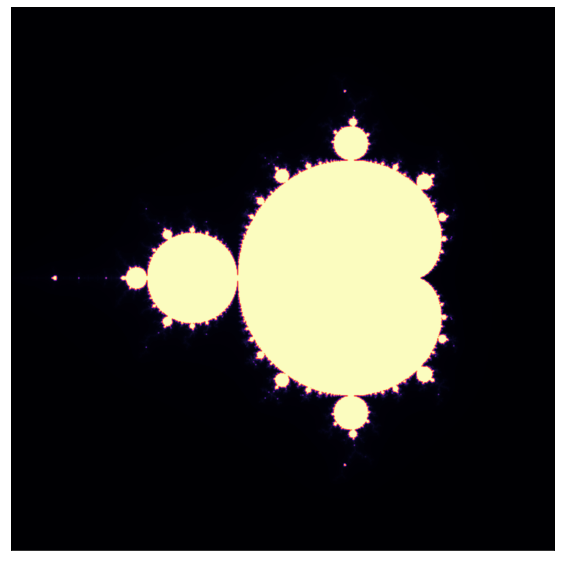

In [ ]:
# --- kl anim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units up and right
density_per_unit = 250  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def mandelbrot(x, y, threshold):
    """Calculates whether the number c = x + i*y belongs to the 
    Mandelbrot set. In order to belong, the sequence z[i + 1] = z[i]**2 + c
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[i+1] is greater than 4.
    
    :param float x: the x component of the initial complex number
    :param float y: the y component of the initial complex number
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks
    
    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold
    
    # iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    # associate colors to the iterations with an iterpolation
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]
 
anim = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
anim.save('mandelbrot.gif',writer='imagemagick')

In [ ]:
## --- kl 2 anim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_start, y_start = -2, -2  # an interesting region starts here
width, height = 4, 3       # for 4 units up and right
density_per_unit = 200     # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)


threshold = 20     # max allowed iterations
frames = 100       # number of frames in the animation

# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = np.linspace(0, 2*np.pi, frames)

fig = plt.figure(figsize=(10, 9))     # instantiate a figure to draw
ax = plt.axes()                        # create an axes object

def julia_quadratic(zx, zy, cx, cy, threshold):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y
    belongs to the Julia set. In order to belong, the sequence 
    z[i + 1] = z[i]**2 + c, must not diverge after 'threshold' number of steps.
    The sequence diverges if the absolute value of z[i+1] is greater than 4.
    
    :param float zx: the x component of z[0]
    :param float zy: the y component of z[0]
    :param float cx: the x component of the constant c
    :param float cy: the y component of the constant c
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge


def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks
    
    X = np.empty((len(re), len(im)))  # the initial array-like image
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])  # the initial c number
    
    # iterations for the given threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(re[i], im[j], cx, cy, threshold)
    
    img = ax.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('julia_set.gif', writer='imagemagick')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only tw

In [ ]:
### --- kl 

import matplotlib.pyplot as plt
import numpy as np
import datetime


# initialize a dictionary of list of the roots
rootlist = {}

# function definitions to evaluate f/f' at x. Add your own as needed.
# each function definition must include a list of the roots of this function
# root list can be in any order and restricted to finite number

# example 1: polynomial function with four roots
def npe1(x):
    return (x**2-1)*(x**2+1)/(2*x*(x**2-1)+2*x*(x**2+1))
rootlist['npe1'] = [-1, 1, -1j, 1j]


# example 2: function with three roots on the unit circle
def npe2(x):
    return (x**3-1)/(3*x**2)
rootlist['npe2'] = [-.5-0.8660254037844386j,-.5+0.8660254037844386j, 1]


# example 2: function with twelve roots on the unit circle
def npe3(x):
    return (x**12-1)/(12*x**11)
rootlist['npe3'] = [-.5-0.8660254037844386j,-.5+0.8660254037844386j,.5-0.8660254037844386j,.5+0.8660254037844386j,-.5j-0.8660254037844386,-.5j+0.8660254037844386,.5j-0.8660254037844386,.5j+0.8660254037844386, 1,-1,1.j,-1.j]


# example 7: function with four roots, all real
def npe7(x):
    return (x+2.)*(x+1.5)*(x-0.5)*(x-2.)/((x+1.5)*(x-0.5)*(x-2.) + (x+2.)*(x-0.5)*(x-2.) +(x+2.)*(x+1.5)*(x-2.) + (x+2.)*(x+1.5)*(x-0.5)) 
rootlist['npe7'] = [-2, -1.5, 0.5, 2]


# example 9: function with four roots, one multiple
def npe9(x):
    return (x+2)*(x+1.5)**2*(x-0.5)*(x-2)/((x+1.5)**2*(x-0.5)*(x-2) + 2*(x+2)*(x+1.5)*(x-0.5)*(x-2) +(x+2)*(x+1.5)**2*(x-2) + (x+2)*(x+1.5)**2*(x-0.5) )
rootlist['npe9'] = [-2, -1.5, 0.5, 2]


# example 10: sine function
def npe10(x):
    return np.tan(x)
rootlist['npe10'] = [0]
for i in range(1,10):
    rootlist['npe10'].extend([i*np.pi,-i*np.pi])



# define a function that can id a root from the rootlist
def id_root(zl,rlist):
    findgoal = 1.e-10 * np.ones(len(zl))
    rootid = -1 * np.ones(len(zl))
    for r in rlist:
        # check for closeness to each root in the list
        rootid = np.where(np.abs(zl-r* np.ones(len(zl))) < findgoal, np.ones(len(zl)) * rlist.index(r), rootid)
            
    return rootid



# define parameters for plotting - adjust these as needed for your function
    
# define left and right boundaries for plotting    
# for overview plots:
interval_left = -2.1
interval_right = 2.1
interval_down = -2.1
interval_up = 2.1

# for detailed plots (adjust as needed):
#interval_left = 1.15
#interval_right = 2.
#interval_down = -0.25
#interval_up = 0.25

# set number of grid points on x and y axes for plotting 
# use 100 for testing plotting ranges, 1000 for nice plots and 2000 for nicer plots
num_x = 1000
num_y = 1000

# set desired precision and max number of iterations
# keep precision goal smaller than findgoal (root matching) above
prec_goal = 1.e-11
# max number of iterations. Is being used in a vectorized way. 
# 50 is a good minimal value, sometimes you need 500 or more
nmax = 200

# timing 
print('Started computation at '+str(datetime.datetime.now()))


# define x and y grids of points for computation and plotting the fractal
xvals = np.linspace(interval_left, interval_right, num=num_x)
yvals = np.linspace(interval_down, interval_up, num=num_y)


# the following defines function to solve and plot. Jump to end of code to choose function
def plot_newton_fractal(func_string, perfom_shading=False):
    
    # create complex list of points from x and y values
    zlist = []
    for x in xvals:
        for y in yvals:
            zlist.append(x + 1j*y)
    
    # initialize the arrays for results, differences, loop counters  
    reslist = np.array(zlist)
    reldiff = np.ones(len(reslist))
    counter = np.zeros(len(reslist)).astype(int)
    # initialize overall counter for controlling the while loop
    overallcounter = 0
    # vectorize the precision goal
    prec_goal_list = np.ones(len(reslist)) * prec_goal
    # iterate while precision goal is not met - vectorized
    while np.any(reldiff) > prec_goal and overallcounter < nmax:
        
        # call function as defined above and 
        # compute iteration step, new x_i, and relative difference
        diff = eval(func_string+'(reslist)')
        z1list = reslist - diff
        reldiff = np.abs(diff/reslist)
        
        # reset the iteration
        reslist = z1list
        
        # increase the vectorized counter at each point, or not (if converged)
        counter = counter + np.greater(reldiff, prec_goal_list )
        # increase the control counter
        overallcounter += 1
    
    # get the converged roots matched up with those predefined in the root list
    nroot = id_root(z1list,rootlist[func_string]).astype(int)
    
    # add information about number of iterations to the rood id for shaded plotting
    if perfom_shading == True:
        nroot = nroot - 0.99*np.log(counter/np.max(counter))

    # uncomment those in case of doubt
#    print(reslist)
#    print(counter)
#    print(nroot)
    
    # get the data into the proper shape for plotting with matplotlib.pyplot.matshow
    nroot_contour = np.transpose(np.reshape(nroot,(num_x,num_y)))
    
    # timing to see difference in time used between calculation and plotting
    print('Finished computation at '+str(datetime.datetime.now()))
    
    # create an imshow plot 
    plt.figure()
    
    #label the axes
    plt.xlabel("$Re(z)$", fontsize=16)
    plt.ylabel("$Im(z)$", fontsize=16)
    
    # plots the matrix of data in the current figure. Interpolation isn't wanted here.
    # Change color map (cmap) for various nice looks of your fractal
    plt.matshow(nroot_contour, fignum=0, interpolation='none', origin='lower', cmap='hot')
    
    # remove ticks and tick labels from the figure
    plt.xticks([])
    plt.yticks([])
    
    # save a file of you plot. 200 dpi is good to match 1000 plot points. 
    # Increasing dpi produces more pixels, but not more plotting points.
    # Number of plotting points and pixels are best matched by inspection.
    plt.savefig('newton-fractal-example-plot-'+func_string+'.jpg', bbox_inches='tight', dpi=200)
        
    plt.close()
    # timing step
    print('Finished creating matshow plot at '+str(datetime.datetime.now()))


# call the solution function for func of your choice
# also, switch shading via number of iterations on or off
plot_newton_fractal('npe1', perfom_shading=True)

# final timing check
print('Finished computation and plotting at '+str(datetime.datetime.now()))

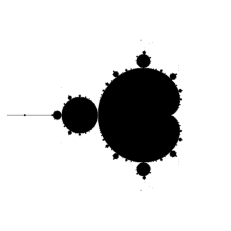

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

PIXEL_SCALE = 200
WIDTH = 3
HEIGHT = 3
XSTART = -2
YSTART = -1.5

image_width = int(PIXEL_SCALE*WIDTH)
image_height = int(PIXEL_SCALE*HEIGHT)

def calc(c1, c2):
    x = y = 0
    for i in range(1000):
        x, y = x*x - y*y + c1, 2*x*y + c2
        if x*x + y*y > 4:
            return i+1
    return 0

array = np.zeros((image_height,
                  image_width,
                  3),
                 dtype=np.uint8)

for i in range(image_width):
    c1 = XSTART + i/PIXEL_SCALE
    for j in range(image_height):
        c2 = YSTART + j/PIXEL_SCALE
        v = calc(c1, c2)
        if v:
            array[j, i,] = (255, 255, 255)

img = Image.fromarray(array)
# img.save('mandelbrot.png')
plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()

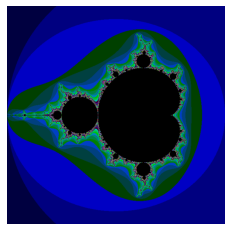

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

PIXEL_SCALE = 200
WIDTH = 3
HEIGHT = 3
XSTART = -2
YSTART = -1.5

image_width = int(PIXEL_SCALE*WIDTH)
image_height = int(PIXEL_SCALE*HEIGHT)

def create_color(v):
    values = [0, 64, 128, 196]
    b = values[v % 4] 
    g = values[(v//4) % 4] 
    r = values[(v//16) % 4]
    return (r, g, b)


def calc(c1, c2):
    x = y = 0
    for i in range(1000):
        x, y = x*x - y*y + c1, 2*x*y + c2
        if x*x + y*y > 4:
            return i+1
    return 0

array = np.zeros((image_height,
                  image_width,
                  3),
                 dtype=np.uint8)

for i in range(image_width):
    c1 = XSTART + i/PIXEL_SCALE
    for j in range(image_height):
        c2 = YSTART + j/PIXEL_SCALE
        v = calc(c1, c2)
        array[j, i,] = create_color(v)

img = Image.fromarray(array)
# img.save('mandelbrot-colour.png')
plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()

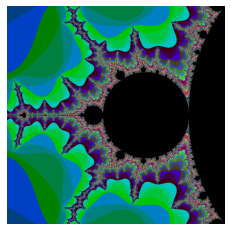

In [ ]:
## zoom nagyítás
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


PIXEL_SCALE = 2000
WIDTH = .3
HEIGHT = .3
XSTART = -1.5
YSTART = -.15

image_width = int(PIXEL_SCALE*WIDTH)
image_height = int(PIXEL_SCALE*HEIGHT)

def create_color(v):
    values = [0, 64, 128, 196]
    b = values[v % 4] 
    g = values[(v//4) % 4] 
    r = values[(v//16) % 4]
    return (r, g, b)


def calc(c1, c2):
    x = y = 0
    for i in range(1000):
        x, y = x*x - y*y + c1, 2*x*y + c2
        if x*x + y*y > 4:
            return i+1
    return 0

array = np.zeros((image_height,
                  image_width,
                  3),
                 dtype=np.uint8)

for i in range(image_width):
    c1 = XSTART + i/PIXEL_SCALE
    for j in range(image_height):
        c2 = YSTART + j/PIXEL_SCALE
        v = calc(c1, c2)
        array[j, i,] = create_color(v)

img = Image.fromarray(array)
# img.save('kl_py_fractral-colour_zoom.png')
plt.imshow(img, cmap='hot')
plt.axis("off")
plt.show()

In [ ]:
import math
from random import randint

# const - upper limit for randint
s = 10

"""Simple fractal tree using SVG and recursion.

Usage:
    Create Root object bt Branch(x1=400, y1=800, x2=400, y2=600, color=60, size=35)
    x1, y1, x2, y2 - start points of root

    Generate Tree Tree(lenght=200, angle=-20, depth=9, x1=400, y1=600, size=35, color=60, outlist=resutlist)

    lenght - lenght of start branch
    angle - start angle of branch
    depth - number of tree level
    x1, y1 - start point of branch
"""


class Branch():
    """Class represents a single branch."""
    def __init__(self, x1, y1, x2, y2, color, size):
        """Assigning  values."""
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        self.color = color
        self.size = size

    def __str__(self):
        """Return path SVG object with points, color and stroke of branch."""
        return '<path d="M {x1} {y1} L {x2} {y2}" stroke="rgb(100,{c},0)" stroke-width="{w}"/>\n'.format(
            x1=self.x1,
            y1=self.y1,
            x2=self.x2,
            y2=self.y2,
            w=self.size,
            c=self.color
        )

    def __repr__(self):
        """Return text represent object."""
        return self.__str__()


class Tree():
    """
    Class represents Tree.

    Tree is composed of Branch object.
    """
    def __init__(self, lenght, angle, depth, x1, y1, size, color, outlist):
        """Main point of start generation."""
        self.branches = self.drawbranch(lenght, angle, depth, x1, y1, size, color, outlist)

    def drawbranch(self, lenght, angle, depth, x1, y1, size, color, outlist):
        """Recursive function for generate three Branch object per iteration."""
        # if depth > 0
        if depth:
            # X value of second point
            x2 = x1 + lenght * math.cos(math.radians(angle))
            # Y value of second point
            y2 = y1 + lenght * math.sin(math.radians(angle))

            # modify lenght of single branch
            lenght = float(2.0 / 3.0 * lenght)
            # modify size of single branch
            size = float(2.0 / 3.0 * size) + 1
            # modify color of single branch
            color += 6

            # X value of B point
            bx = x1
            # Y value of B point
            by = y2

            # X value of C point
            cx = -x2 + 2 * x1
            # Y value of C point
            cy = y2

            # Create A point
            b1 = Branch(x1, y1, x2, y2, color, size)
            # Add to list
            outlist.append(str(b1))
            # Call drawbranch function (recursion)
            self.drawbranch(lenght, angle + randint(-10, s), depth - 1, x2, y2, size, color, outlist)

            # Create B point
            b2 = Branch(x1, y1, bx, by, color, size)
            # Add to list
            outlist.append(str(b2))
            # Calculate new angle
            nangle = angle + randint(-1, 0) * randint(1, s)
            # Call drawbranch function (recursion)
            self.drawbranch(lenght, nangle, depth - 1, bx, by, size, color, outlist)

            # Create C point
            b3 = Branch(x1, y1, cx, cy, color, size)
            # Add to list
            outlist.append(str(b3))
            # Calculate new angle
            nangle = angle + randint(0, 1) * randint(1, s)
            # Call drawbranch function (recursion)
            self.drawbranch(lenght, nangle, depth - 1, cx, cy, size, color, outlist)

        # Return list of branches
        return outlist

    def write_svg(self, output='kl_py_fractral_12.svg'):
        """Function that write all branches to SVG file."""
        with open(output, 'w') as outfile:
            # Write SVG declaration
            outfile.write('<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 800" version="1.1">\n')
            # Map to str all branches and write it into file
            outfile.writelines(map(str, self.branches))
            # End of SVG file
            outfile.write('</svg>\n')


print ("Start generating, please wait..")
# Create empty list
resutlist = []
# Create root of Tree and add to list
resutlist.append(Branch(x1=400, y1=800, x2=400, y2=600, color=60, size=35))

# Call Tree object
t = Tree(lenght=200, angle=-20, depth=9, x1=400, y1=600, size=35, color=60, outlist=resutlist)
# After generate tree save to file
t.write_svg()

print ("Done, check SVG file")

Start generating, please wait..
Done, check SVG file


In [ ]:
import math
from random import randint
from collections import namedtuple

# const - upper limit for randint
s = 20


class Point(namedtuple('Point', 'x y')):

    def __str__(self):
        return'{} {}'.format(self.x, self.y)

    def __add__(self, other):
        assert isinstance(other, Point)
        return Point(self.x + other.x, self.y + other.y)

    def __mul__(self, other):
        return Point(self.x * other, self.y * other)

    def __rmul__(self, other):
        return self.__mul__(other)


class Branch(namedtuple('Branch', 'p1 p2 color size')):

    def __str__(self):
        """Path SVG object with points, color and stroke of branch."""
        return ('<path d="M {p1} L {p2}" '
                'stroke="rgb(100,{c},0)" stroke-width="{w}"/>\n'.
                format(p1=self.p1, p2=self.p2, w=self.size, c=self.color))

    def __repr__(self):
        return self.__str__()


class Tree(object):

    def __init__(self, length, angle, depth, point, size, color, outlist):
        """Main point of start generation."""
        self.branches = outlist
        self.draw_branches(length, angle, depth, point, size, color)

    def draw_branches(self, length, angle, depth, p1, size, color):
        """ Recursively generate three Branch objects per iteration."""
        if depth <= 0:
            return

        p2 = p1 + length * Point(
            math.cos(math.radians(angle)),
            math.sin(math.radians(angle))
        )

        # set some new characteristics for the next level
        branch_length = 2.0 / 3.0 * length
        branch_size = 2.0 / 3.0 * size + 1
        color += 6

        # Calculate new angle and recurse
        self.branches.append(Branch(p1, p2, color, branch_size))
        nangle = angle + randint(-10, s)
        self.draw_branches(branch_length, nangle, depth - 1,
                           p2, branch_size, color)

        # Calculate new angle and recurse
        b = Point(p1.x, p2.y)
        self.branches.append(Branch(p1, b, color, branch_size))
        nangle = angle + randint(-1, 0) * randint(1, s)
        self.draw_branches(branch_length, nangle, depth - 1,
                           b, branch_size, color)

        # Calculate new angle and recurse
        c = Point(-p2.x + 2 * p1.x, p2.y)
        self.branches.append(Branch(p1, c, color, branch_size))
        nangle = angle + randint(0, 1) * randint(1, s)
        self.draw_branches(branch_length, nangle, depth - 1,
                           c, branch_size, color)

    def write_svg(self, output='kl_py_fractral_20.svg'):
        with open(output, 'w') as outfile:
            outfile.write('<svg xmlns="http://www.w3.org/2000/svg" '
                          'viewBox="0 0 800 800" version="1.1">\n')
            outfile.writelines(map(str, self.branches))
            outfile.write('</svg>\n')


print("Start generating, please wait..")

# a starting point
resultlist = [Branch(Point(400, 800), Point(400, 600), color=60, size=35)]

# Build and save the tree as an svg
t = Tree(length=200, angle=-20, depth=9, point=Point(400, 600), size=35, color=60, outlist=resultlist)
t.write_svg()

print("Done, check SVG file")

Start generating, please wait..
Done, check SVG file


In [ ]:
## svg file megtekintése
from IPython.display import SVG
def show_svg():
#    return SVG(url=r'kl_py_fractral_12.svg')
    return SVG(filename=r'kl_py_fractral_12.svg')

show_svg()



---

## Minta ábrák


---

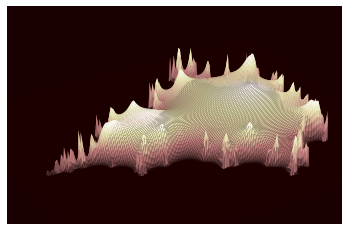

In [ ]:
#########################################################
# Mandelbrot mountain landscape generation as a whole
#########################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-120,elev=45) # set view orientation
ax.dist = 5.0 # set viewpoint distance
ax.set_facecolor([.1,0.0,0.0]) # set ground color
n = 8 # set number of cycles
dx = -0.7 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.5 # set square area side
M = 200 # set side number of pixels

def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = np.zeros(M) # complex plane starting points area
W = np.zeros((M,M)) # zero matrix of elevation values
C = X + 1j*Y # complex plane area
for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z) # smoothed sum moduls

ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-L,2*L) # set z axis limits
ax.axis("off") # do not plot axes

ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap="pink") # plot surface as a whole

plt.show() # show plot


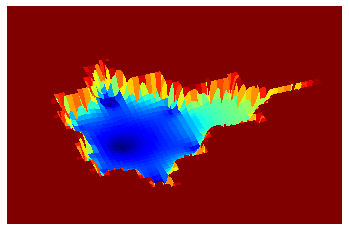

In [ ]:
##########################################################
# Mandelbrot valley landscape generation as a whole
#########################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=70,elev=70) # set view orientation
ax.dist = 6 # set viewpoint distance
ax.set_facecolor([.5,0.0,0.0]) # set ground color
n = 9 # set number of cycles
dx = -0.6 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.4 # set square area side
M = 400 # set side number of pixels
x = np.linspace(dx-L,dx+L,M) # x variable array
y = np.linspace(dy-L,dy+L,M) # y variable array
X,Y = np.meshgrid(x,y,sparse=True) # square area grid
Z = np.zeros(M) # complex plane starting points area
C = X + 1j*Y # complex plane area
for k in range(1,n+1): # recursion cycle
    ZZ = Z*Z + C
    Z = ZZ
    W = np.e**(-.6*np.abs(Z)) # smoothed sum moduls
ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-L,L) # set z axis limits
ax.axis("off") # do not plot axes
# plot surface as a whole
surf = ax.plot_surface(X, Y, -W, cmap=cm.jet,linewidth=0, antialiased=False)

plt.show() ## show plot


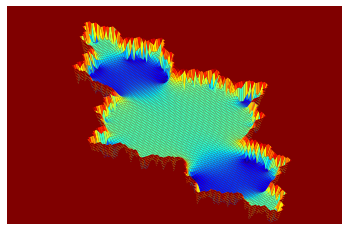

In [ ]:
################################################
# Julia valley landscape generation as a whole
################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module


fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=150,elev=60) # set view orientation
ax.dist = 3.5 # set viewpoint distance
ax.set_facecolor([0.5,0.0,0.0]) # set ground color
n = 9 # set number of cycles
dx = 0.0 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 2.0 # set square area side
M = 200 # set side number of pixels

def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
cX = -0.7454294 # set parameter C real part value
cY = 0 # set parameter C imaginary part value
C = cX + 1j*cY # complex C matrix
W = np.zeros((M,M)) # zero matrix of elevation values
Z = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)
    
ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-2*L,2*L) # set z axis limits
ax.axis("off") # do not plot axes
ax.plot_surface(X, Y, -W, rstride=1, cstride=1, cmap="jet") # plot surface as a whole
plt.show() # show plot

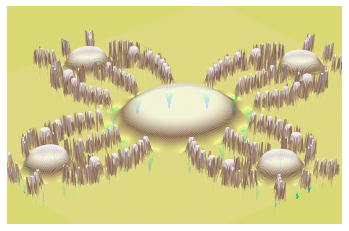

In [ ]:
################################################################
# Newton’s method mountain landscape generation as a whole
################################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-130,elev=45) # set view orientation
ax.dist = 4.3 # set viewpoint distance
ax.set_facecolor([.85,.85,.45]) # set ground color
n = 8 # set number of cycles
dx = 0.0 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.0 # set square area side
M = 300 # set side number of pixels

def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))
x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z - (Z**4 + 1)/(4*Z**3)
    Z = ZZ
    W = f(Z)
    
ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-2.5*L,2*L) # set z axis limits
ax.axis("off") # do not plot axes
ax.plot_surface(X, Y, -W, rstride=1, cstride=1, cmap="terrain") # plot surface as a whole
plt.show() # show plot

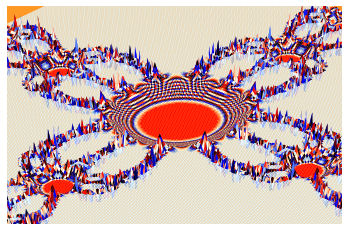

In [ ]:
############################################################
# Newton’s method valley landscape generation as a whole
############################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-140,elev=45) # set view orientation
ax.dist = 3.0 # set viewpoint distance
ax.set_facecolor([1.0,.6,.15]) # set ground color
n = 8 # set number of cycles
dx = 0.0 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.3 # set square area side
M = 300 # set side number of pixels

def f(Z): # def scale damping of the depth function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z - (Z**4 + 1)/(4*Z**3)
    Z = ZZ
    W = f(Z)
    
ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-3.5*L,4*L) # set z axis limits

ax.axis("off") # do not plot axes
ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap='flag') # plot surface as a whole
plt.show() # show plot

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in absolute


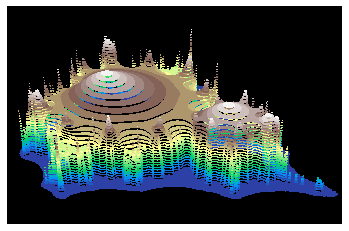

In [ ]:
###########################################################
# Mandelbrot mountain landscape generation as a whole
###########################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=120,elev=45) # set view orientation
ax.dist = 5 # set viewpoint distance
ax.set_facecolor([0.0,0.0,0.0]) # set background color
n = 16 # set number of cycles
dx = -0.6 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.3 # set square area side
M = 200 # set side number of pixels

def f(Z): # def scale damping of the elevation function
   return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = np.zeros(M) # complex plane starting points area
W = np.zeros((M,M)) # zero matrix of elevation values
C = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)

ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-.5*L,1.5*L) # set z axis limits
ax.axis("off") # do not plot axes
ax.contourf3D(X, Y, W, 2*n, cmap="terrain") # make contour plot
plt.show() # show plot

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in absolute


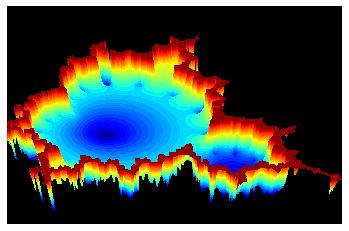

In [ ]:
########################################################
# Mandelbrot valley landscape generation as a whole
########################################################


import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=120,elev=60) # set view orientation
ax.dist = 4.5 # set viewpoint distance
ax.set_facecolor([0.0,0.0,0.0]) # set background color
n = 20 # set number of cycles
dx = -0.6 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.3 # set square area side
M = 200 # set side number of pixels

def f(Z): # def scale damping of the elevation function
  return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = np.zeros(M) # complex plane starting points area
W = np.zeros((M,M)) # zero matrix of elevation values
C = X + 1j*Y # complex plane area
for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)
    
ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-L,1.5*L) # set x axis limits
ax.axis("off") # do not plot axes
ax.contourf3D(X, Y, -W, 2*n, cmap="jet") # make contour plot
plt.show() # show plot

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in square
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in absolute


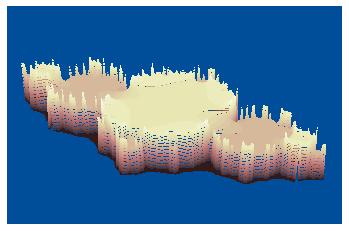

In [ ]:
#####################################################
# Julia mountain landscape generation as a whole
#####################################################

import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection="3d")
ax.view_init(azim=120,elev=45) # set view orientation
ax.dist = 4.5 # set viewpoint distance
ax.set_facecolor([0.0,0.3,0.6]) # set background color
n = 16 # set number of cycles
dx = -0.1 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.7 # set square area side
M = 200 # set side number of pixels

def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
cX = -0.7454294 # C parameter real part value
cY = 0 # C parameter imaginary part value
C = cX + 1j*cY # complex C matrix
W = np.zeros((M,M)) # zero matrix of elevation values
Z = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z)

ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-.8*L,1.5*L) # set z axis limits

ax.axis("off") # do not plot axes
ax.contourf3D(X, Y, W, 2*n, cmap="pink") # make contour plot
plt.show() # show plot

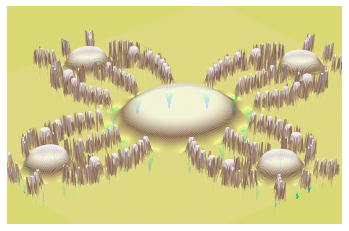

In [ ]:
##############################################################
# Newton’s method mountain landscape generation as a whole
##############################################################


import matplotlib.pyplot as plt # import matplotlib modules
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.figure as fg
from matplotlib import cm # import color maps module
import numpy as np # import numpy module

fig = plt.figure() # set 3D figure environment
ax = fig.add_subplot(111, projection="3d")
ax.view_init(azim=-130,elev=45) # set view orientation
ax.dist = 4.3 # set viewpoint distance
ax.set_facecolor([.85,.85,.45]) # set background color
n = 8 # set number of cycles
dx = 0.0 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.0 # set square area side
M = 300 # set side number of pixels

def f(Z): # def scale damping of the depth function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = X + 1j*Y # complex plane area

for k in range(1,n+1): # recursion cycle
    ZZ = Z - (Z**4 + 1)/(4*Z**3)
    Z = ZZ
    W = f(Z)

ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-2.5*L,2*L) # set z axis limits

ax.axis("off") # do not plot axes
ax.plot_surface(X, Y, -W, rstride=1, cstride=1, cmap="terrain") # make contour plot
plt.show() # show plot
